## Correlation $\langle z_i F_J \rangle$

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [1]:
ls=[16,24,32,64,128,256]
h_max=5.44
zf={}
f={}
z={}
for l in ls:
    data=np.load(f'data/input_output_map/input_output_2nn_{l}_l_{h_max}_h_100_n.npz')
    zf[l]=data['correlation']
    f[l]=data['density_F']
    z[l]=data['density']

NameError: name 'np' is not defined

#### Study the Quantum Covariance

In [3]:

g={}
for l in ls:

    cov=zf[l]-f[l][:,None,:]*z[l][:,:,None]

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    
g_cl={}
for l in ls:
    
    df=f[l]-np.average(f[l],axis=0)[None,:]
    dz=z[l]-np.average(z[l],axis=0)[None,:]
    
    cov=np.average(df[:,None,:]*dz[:,:,None],axis=0)/(np.std(f[l],axis=0)[None,:,None]*np.std(z[l],axis=0)[None,None,:])

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g_cl[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    

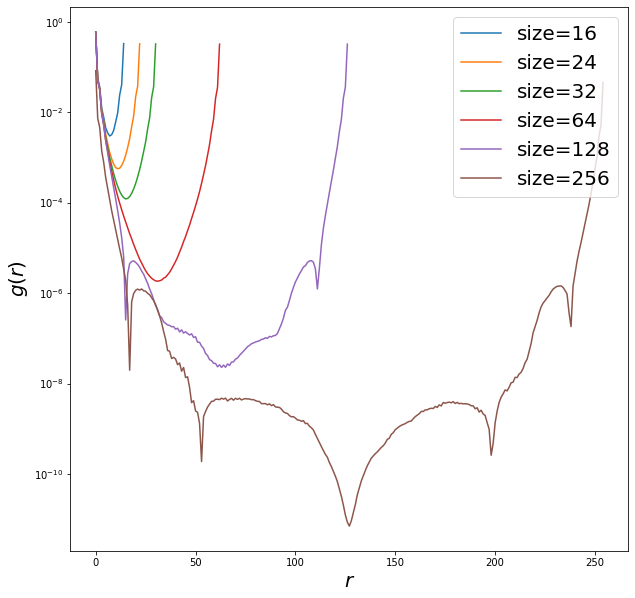

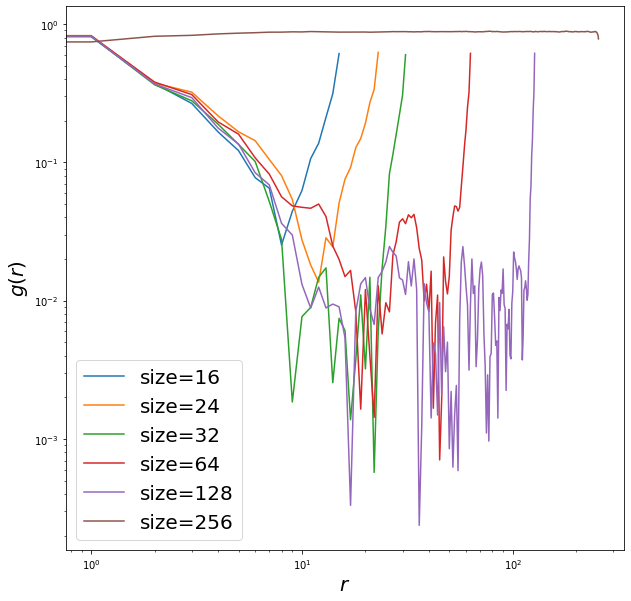

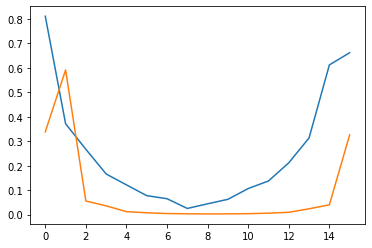

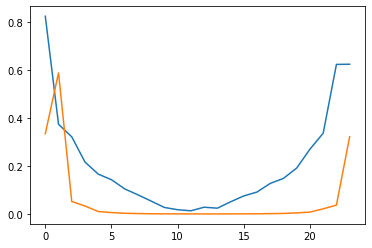

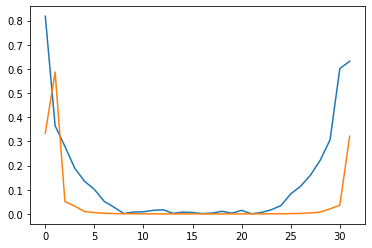

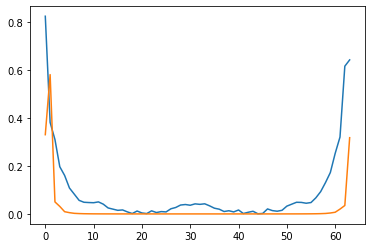

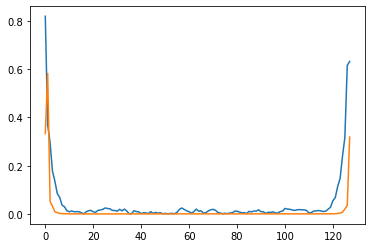

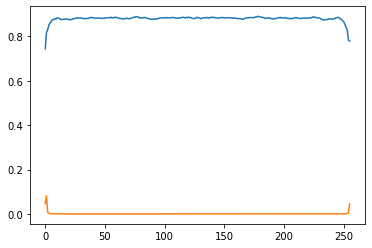

In [99]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1)[1:],label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.semilogy()
plt.show()

plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=1),label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.loglog()
plt.show()

for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=0),label=f'size={l} cl')
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1),label=f'size={l} quantum')
    plt.show()


#### Three point correlations

In [36]:
import numpy as np

a=2.7
l=16
data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{l}_l_{a}_h_15000_n.npz')

z=data['density'][:10000]

three_point=(1/z.shape[0])*np.einsum('ai,aj,ak->ijk',z,z,z)-np.average(z,axis=0)**3
two_point=(1/z.shape[0])*np.einsum('ai,aj->ij',z,z)-np.average(z,axis=0)**2
print(np.max(np.abs(three_point)))


0.10387397


[[[0.10111949 0.07038698 0.05619964 ... 0.05045724 0.0622296  0.07829365]
  [0.07501918 0.07073131 0.04895484 ... 0.03312635 0.04366097 0.05648494]
  [0.05870304 0.04682606 0.05651131 ... 0.02300587 0.03229749 0.04358271]
  ...
  [0.04963297 0.02766985 0.01967812 ... 0.0501574  0.04161295 0.04196793]
  [0.05537593 0.03217515 0.02294043 ... 0.03558365 0.06110594 0.05384669]
  [0.07043052 0.04398966 0.03321612 ... 0.0349291  0.05283716 0.07729742]]

 [[0.07501918 0.07073131 0.04895484 ... 0.03312635 0.04366097 0.05648494]
  [0.07536352 0.09865373 0.07208663 ... 0.04926711 0.0568895  0.06431869]
  [0.05145827 0.06995788 0.07204151 ... 0.03048444 0.03719601 0.04367125]
  ...
  [0.03230205 0.04381064 0.02715668 ... 0.04842773 0.037209   0.03259203]
  [0.03680733 0.04540366 0.02783895 ... 0.03117973 0.05523998 0.04245111]
  [0.04862186 0.05182335 0.03330466 ... 0.0255532  0.04144159 0.06301919]]

 [[0.05870304 0.04682606 0.05651131 ... 0.02300587 0.03229749 0.04358271]
  [0.05145827 0.069957

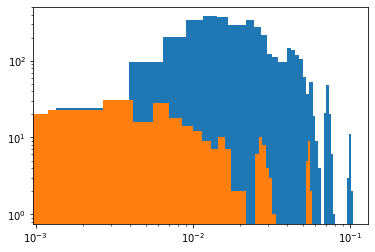

In [37]:
import matplotlib.pyplot as plt
print((np.abs(three_point)))

plt.hist(np.abs(three_point).reshape(-1),bins=40)
plt.hist(two_point.reshape(-1),bins=40)
plt.loglog()

plt.show()

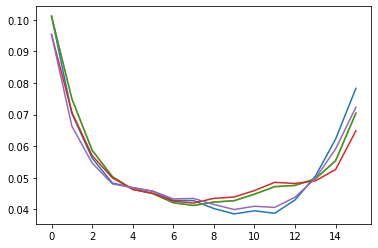

In [38]:
plt.plot(np.abs(three_point[0,0,:]))
plt.plot(np.abs(three_point[0,:,0]))
plt.plot(np.abs(three_point[:,0,0]))


plt.plot(two_point[:,0]+0.04)
plt.plot(two_point[0,:]+0.04)
plt.show()

## Input Input and Input Output Correlations

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_64_l_2.7_h_15000_n.npz')
z=data['density']
f=data['density_F']
data=np.load('data/fml_8.npz')
fml=data['density_F']

df=np.abs(np.average(fml-f,axis=-1))/np.abs(np.average(f,axis=-1))
plt.hist(df,bins=1000)
plt.loglog()
plt.show()




ValueError: operands could not be broadcast together with shapes (1000000,256) (15000,64) 

In [3]:

print(fml.shape)
z=z[df<0.01]
f=f[df<0.01]

df=f-np.average(f,axis=0)[None,:]
dz=z-np.average(z,axis=0)[None,:]


NameError: name 'df' is not defined

In [4]:
av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
av_zfml=np.einsum('ai,aj->ij',dz,df_ml)/f.shape[0]
l=256
c=np.zeros((l,l))
cml=np.zeros((l,l))

    
for s in range(l):
    for j in range(l):
        c[s,j]=av_zf[s,(s+j) %l]
        cml[s,j]=av_zfml[s,(s+j) %l]
g=np.abs(np.average(c,axis=0)) #from 0 to l-1
gml=np.abs(np.average(cml,axis=0))



NameError: name 'dz' is not defined

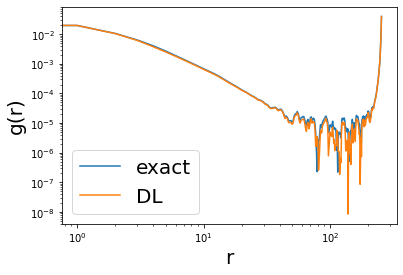

[]

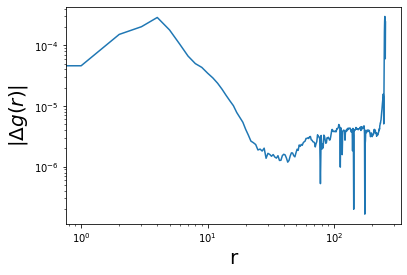

In [43]:
plt.plot(g,label='exact')
plt.plot(gml,label='DL')
plt.loglog()
plt.xlabel('r',fontsize=20)
plt.ylabel('g(r)',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.plot(np.abs(g-gml))
plt.xlabel('r',fontsize=20)
plt.ylabel(r'$|\Delta g(r)|$',fontsize=20)
plt.loglog()

## Classical ZXX correlation

## 1nn Ising Case

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib

In [2]:
ls=[8,12,14,16,18,20,22,24,32,48,64]
hs=[2.7]
zs={}
fs={}
cov={}
g_fz={}
g_zz={}
l=ls[0]
for a in ls:
    l=a
    data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{a}_l_{hs[0]}_h_15000_n.npz')
    z=data['density']
    f=data['density_F']
    fs[a]=f
            
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    print('done df')
    print(df.shape)
    av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
    av_zz=np.einsum('ai,aj->ij',dz,dz)/f.shape[0]
    av_z_av_f=(np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:])
    av_z_av_z=(np.average(dz,axis=0)[:,None]*np.average(dz,axis=0)[None,:])
    cov_zf=av_zf#-av_z_av_f
    cov_zz=av_zz#-av_z_av_z
    c_zz=np.zeros((l,l))
    c_fz=np.zeros((l,l))

    
    for s in range(l):
        for j in range(l):
            c_zz[s,j]=cov_zz[s,(s+j) %l]
            c_fz[s,j]=cov_zf[s,(s+j) %l]
    g_zz[a]=np.abs(np.average(c_fz,axis=0)) #from 0 to l-1
    g_fz[a]=np.abs(np.average(c_zz,axis=0))
    
    

done df
(15000, 8)
done df
(15000, 12)
done df
(15000, 14)
done df
(15000, 16)
done df
(15000, 18)
done df
(1000000, 20)
done df
(1000000, 22)
done df
(15000, 24)
done df
(15000, 32)
done df
(1000000, 48)
done df
(1000000, 64)


#### u_n-u/u

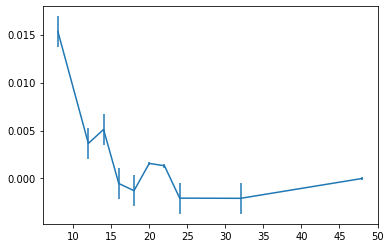

In [46]:
du=np.zeros(shape=len(ls))
std_du=np.zeros(shape=len(ls))
for i,l in enumerate(ls):
    u_n=np.average(fs[l])
    u_64=np.average(fs[64])
    du[i]=(u_n-u_64)/u_64
    std_du[i]=np.std(fs[l])/np.sqrt(fs[l].shape[0])
plt.errorbar(ls[:-1],(du[:-1]),yerr=std_du[:-1])
#plt.loglog()
plt.show()

#### Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


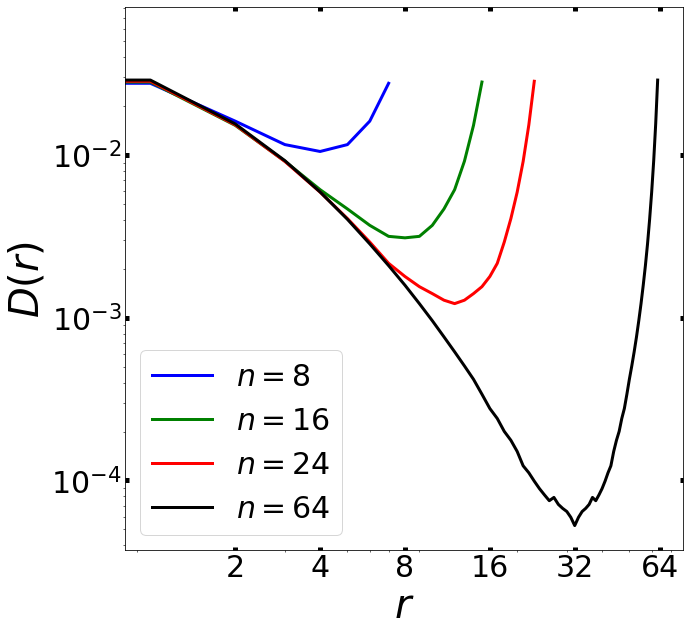

In [9]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(8),g_fz[8],label=r'$n=8$',color='blue',linewidth=3)
#plt.plot(np.arange(12),g_fz[12],label=r'$g_{12}(r)$',color='black',linewidth=3)
#plt.plot(np.arange(14),g_fz[14],label=r'$g_{14}(r)$',color='black',linewidth=3)
plt.plot(np.arange(16),g_fz[16],label=r'$n=16$',color='green',linewidth=3)
#plt.plot(np.arange(18),g_fz[18],label=r'$g_{18}(r)$',color='black',linewidth=3)
plt.plot(np.arange(24),g_fz[24],label=r'$n=24$',color='red',linewidth=3)
#plt.plot(np.arange(32),g_fz[32],label=r'$g_{32}(r)$',color='black',linewidth=3)
plt.plot(np.arange(64),g_fz[64],label=r'$n=64$',color='black',linewidth=3)
#plt.plot(np.arange(256),g_fz[256],label=r'$g_{256}(r)$',color='red',linewidth=3)
#plt.plot(np.arange(512),g_fz[512],label=r'$g_{512}(r)$',color='green',linewidth=3)
x=np.arange(1,64)
#plt.plot(x,x**(-3.),color='black',linestyle='--')

plt.xlabel(r'$r$',fontsize=40)
plt.legend(fontsize=30)
plt.loglog()
plt.ylabel(r'$D(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.savefig('plot_for_the_paper/scalability_error/input_input_output_input.eps',format='eps',bbox_inches = "tight")
plt.show()

[ 2.71468002e-02 -1.14864249e+00  6.81465530e+07]


/tmp/ipykernel_2123290/3207590743.py:5: RuntimeWarning: divide by zero encountered in power
  return a*(x**b)*np.exp(-(x/c))


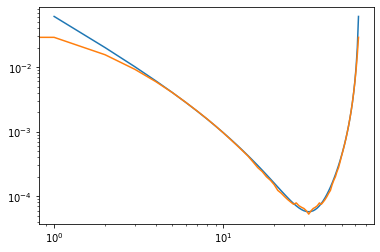

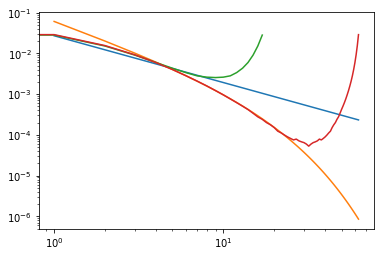

/tmp/ipykernel_2123290/3207590743.py:49: RuntimeWarning: invalid value encountered in subtract
  diff_g_pbc[i]=np.abs(f_64-f)[i]+np.abs(f_64-f)[-i]


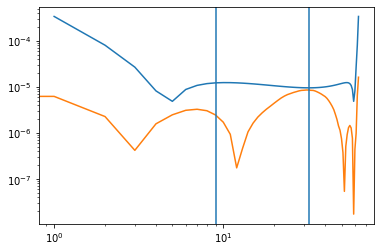

/tmp/ipykernel_2123290/3207590743.py:56: RuntimeWarning: invalid value encountered in subtract
  np.save(f'h_{hs[0]}_diff_correlation_{n}',np.abs(f_64-f))


In [19]:
### curve fit
from scipy.optimize import curve_fit

def d(x,a,b,c):
    return a*(x**b)*np.exp(-(x/c))

#def d(x,a,b,c):
#  return a**np.exp(-1*(x/b)**(c+0.5))

l=64
n=18
idx_init=5
idx_init1=5
x=np.arange(idx_init1,n//2)
y=np.arange(l)
param,boh=curve_fit(d,x,g_fz[n][idx_init1:n//2],maxfev=10000)

print(param)

f=d(y,param[0],param[1],param[2])
x=np.arange(idx_init,l//2)
param,boh=curve_fit(d,x,g_fz[l][idx_init:l//2],maxfev=10000)
f_64=d(y,param[0],param[1],param[2])

f_pbc=np.zeros(f_64.shape[0])
for i in range(f_64.shape[0]):
    f_pbc[i]=(f_64[i]+f_64[-i])
    


plt.plot(f_pbc)
plt.plot(g_fz[64])

np.savez(f'g_and_g_ml_h_{hs[0]}_n_{n}',g=g_fz[n],g_fit=f)

plt.loglog()
plt.show()

plt.plot(y,f)
plt.plot(f_64)
plt.plot(g_fz[n])
plt.plot(y,g_fz[64])
plt.loglog()
plt.show()

diff_g_pbc=np.zeros_like(f_64)
dg_ml=np.load(f'dg_model_n_{n}_l_64.npy')
for i in range(diff_g_pbc.shape[0]):
    diff_g_pbc[i]=np.abs(f_64-f)[i]+np.abs(f_64-f)[-i]
plt.plot(0.01*diff_g_pbc)
plt.plot(dg_ml)
plt.axvline(x=n//2)
plt.axvline(x=l//2)
plt.loglog()
plt.show()
np.save(f'h_{hs[0]}_diff_correlation_{n}',np.abs(f_64-f))


#### Data

In [163]:
ls=[256]
hs=[1.8,2.7,3.5]
zs={}
fs={}
cov={}
g={}

l=ls[0]
for a in hs:
    if a!=2.7:
        data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{l}_l_{a}_h_5000000_n.npz')
    else:
        data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{l}_l_{a}_h_15000_n.npz')
    z=data['density']
    f=data['density_F']

            
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    print('done df')
    av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
    print('done av_zf')
    std_av=(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    print('done std_av')
    av_z_av_f=(np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:])
    av_zf=av_zf-av_z_av_f
    cov=av_zf/std_av
    
    c=np.zeros((l,l))

    
    for s in range(l):
        for j in range(l):
            c[s,j]=cov[s,(s+j) %l]
            
    g[a]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

done df
done av_zf
done std_av
done df
done av_zf
done std_av
done df
done av_zf
done std_av


#### Plots

First Plot

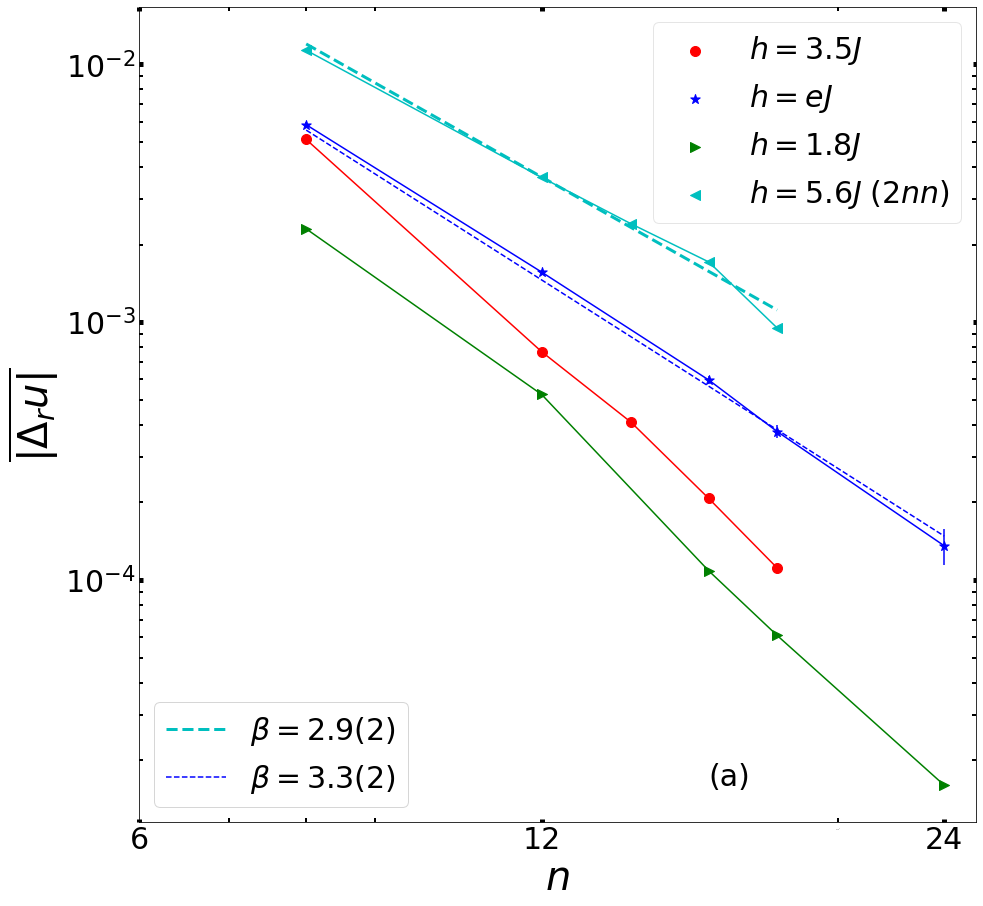

In [22]:
fig,ax=plt.subplots(1,1,figsize=(15,15))

data=np.load('de_35.npz')
blocks=data['blocks']
devde_35=data['devde_35']
de_35=data['de_35']

ax.plot(blocks,de_35,color='red')
a=ax.scatter(blocks,de_35,color='red',marker='o',s=100,label=r'$h=3.5 J $')
x=np.asarray(blocks)
#line2,=ax.plot(x,np.exp(4.5)*x**(-4.7),linestyle='--',color='red',label=r'$\beta= 4.7(2)$')
data=np.load('de_27.npz')
blocks=data['blocks']
devde_27=data['devde_27']
de_27=data['de_27']
ax.errorbar(blocks,de_27,yerr=devde_27/np.sqrt(200),color='blue')
b=ax.scatter(blocks,de_27,color='blue',marker='*',s=100,label=r'$h=e J $')

x=np.asarray(blocks)
data=np.load('de_18.npz')
blocks=data['blocks']
devde_18=data['devde_18']
de_18=data['de_18']
ax.plot(blocks,de_18,color='green')
c=ax.scatter(blocks,de_18,color='green',marker='>',s=100,label=r'$h=1.8 J$')


data=np.load('de_56.npz')
l_train=data['blocks']
devde_56=data['devde_56']
de_56=data['de_56']
ax.plot(l_train,de_56,color='c')
d=ax.scatter(l_train,de_56,color='c',marker='<',s=100,label=r'$h=5.6J \; (2nn)$')
#plt.errorbar(blocks,final_de_25,yerr=de_err,color='green',marker='o',label=r'$h=2.5 J (\sim 0.92 h_c)$')
#plt.plot(x,2.5*x**(-3.),linestyle='--',color='red')
#plt.text(x=13,y=0.0015,s=r'$\beta \simeq 3$',fontsize=30,color='blue',rotation = -35,
#         rotation_mode = 'anchor')


#line3,=ax.plot(x,np.exp(4.88)*x**(-5.03),linestyle='--',color='green',label=r'$\beta= 5.0(2)$')
#plt.text(x=13,y=0.00075,s=r'$D(n,h=3.5J)$',fontsize=30,color='red',rotation = -40,
#         rotation_mode = 'anchor')
#plt.errorbar(blocks,final_de_25,yerr=de_err,color='green',marker='o',label=r'$h=2.5 J (\sim 0.92 h_c)$')
line1,=ax.plot(x,np.exp(1.67)*x**(-3.3),linestyle='--',color='blue',label=r'$\beta=3.3(2)$')
x=np.asarray(l_train)
line4,=ax.plot(x,np.exp(1.67)*x**(-2.93),linewidth=3,linestyle='--',color='c',label=r'$\beta=2.9(2)$')
legend1=ax.legend(fontsize=30,handles=[a,b,c,d],loc='upper right',framealpha=0.5,fancybox=True)
ax.text(x=16,y=1.6*10**-5,s='(a)',fontsize=30)
#plt.text(x=13,y=0.00036,s=r'$D(n,h=1.8J)$',fontsize=30,color='green',rotation = -42,
#        rotation_mode = 'anchor')
#plt.plot(x,0.02*np.exp(-0.16*x),linestyle=':',color='green',label=r'$\propto exp(-l/\xi) (h_c)$',linewidth=3)
ax.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
ax.loglog()
#plt.semilogy()

ax.set_xlabel(r'$n$',fontsize=40)
ax.set_ylabel(r'$\overline{|\Delta_r u|} $',fontsize=40)

ax.set_xticks([6,12,24],[6,12,24])
ax.set_yticks([0.01,0.001,0.0001,0.00001],[r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$",r"$10^{-5}$"])

ax.legend(fontsize=30,handles=[line4,line1],loc='lower left')
ax.add_artist(legend1)
#ax.minorticks_off()

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=None,numticks=0)

ax.loglog()
ax.tick_params(
            which='minor',
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=0,
            width=2,
            length=4
            
        )
ax.set_xticks([6,12,24],[6,12,24])

#plt.xticks([10,14,18,22,26,30],[10,14,18,22,26,30])
plt.savefig('plot_for_the_paper/scalability_error/scaling_law_three_plots.pdf',format='pdf',bbox_inches = "tight")
#plt.savefig('plot_for_the_paper/scalability_error/pearson_different_disorder',format='pdf')

plt.show()


Second Plot

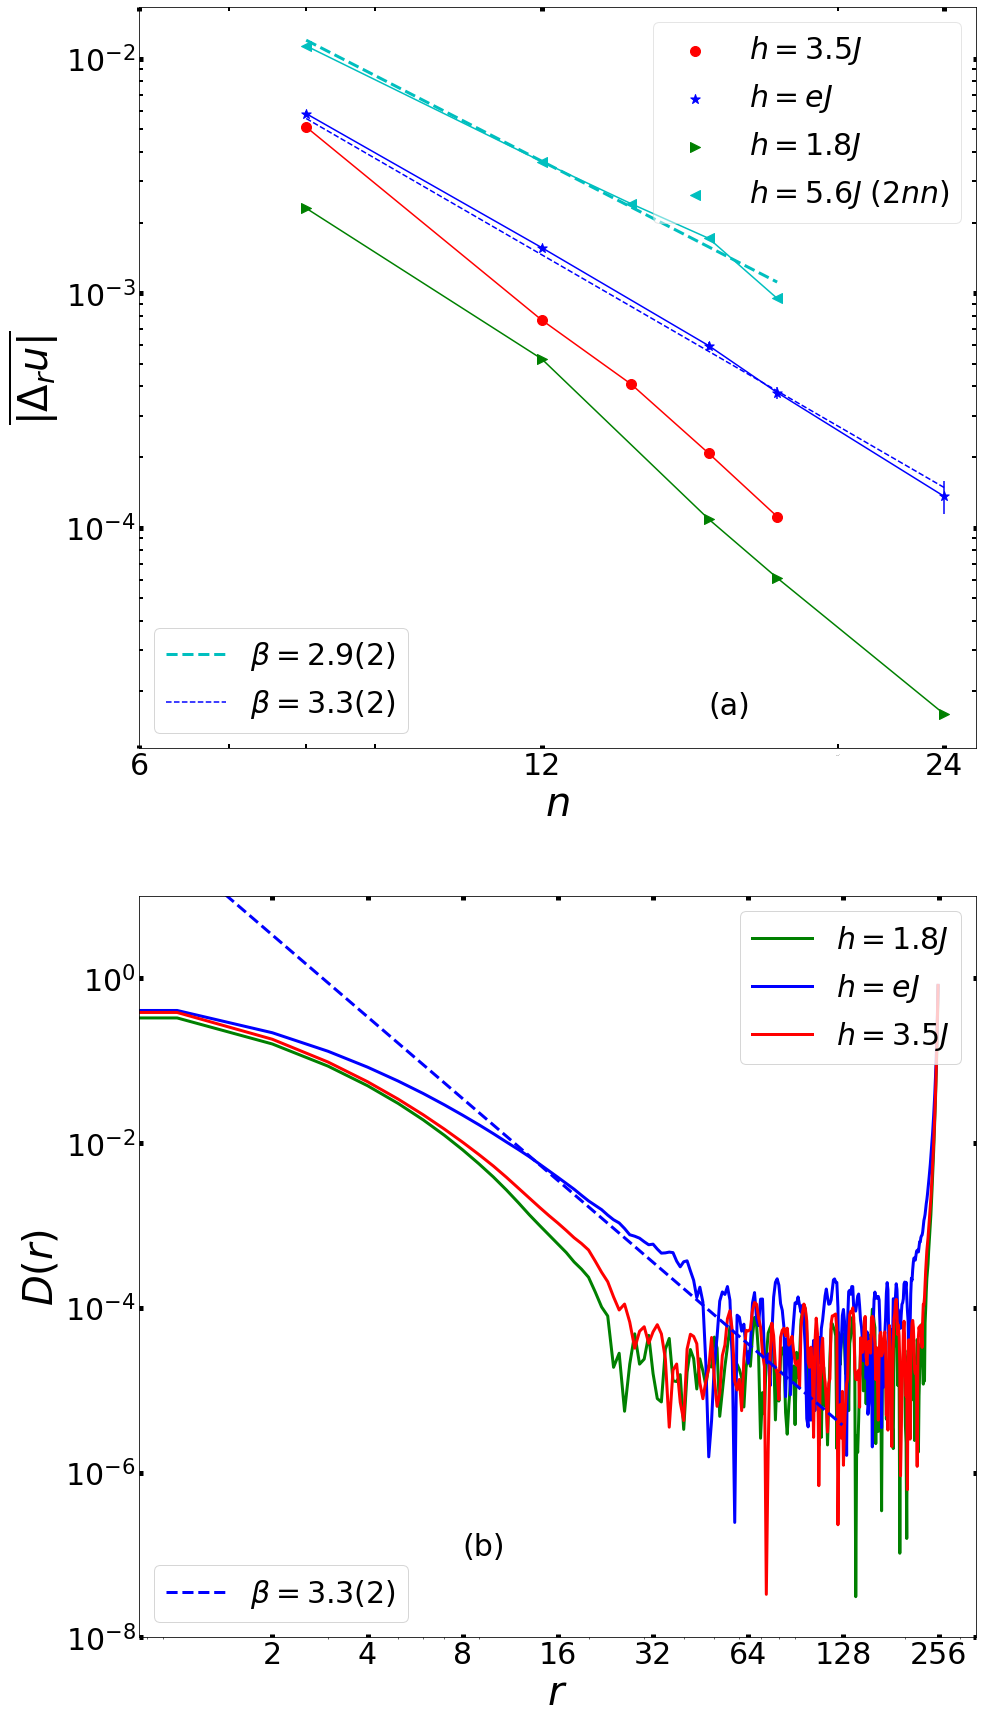

In [169]:
fig,ax=plt.subplots(3,1,figsize=(10,10))
colors=['green','blue','red']
labels=[r'$h=1.8J$',r'$h=eJ$',r'$h=3.5J$']

#g={}
#g_fit={}
for i,a in enumerate([1.8,2.7,3.5]):
    #data=np.load(f'g_and_g_ml_h_{a}.npz')
    #g[a]=data['g']
    #g_fit[a]=data['g_fit']
    ax[0].plot(np.roll(g[a],shift=0),label=labels[i],linewidth=3,color=colors[i])
    


#plt.plot(0.1*np.exp(np.arange(32)*(-0.3)),color='grey',linestyle='--',label='exp',linewidth=4)
#plt.axvline(x=9,color='red')
#plt.axvline(x=64,color='red')
#plt.axvline(x=32,color='red')

ax[0].loglog()
#plt.semilogy()
legend1=ax[0].legend(fontsize=30,loc='upper right')


x=np.arange(1,256)
#line1b,=ax[0].plot(g_fit[2.7],linestyle='--',color='blue',linewidth=3)
#line2b,=ax[0].plot(g_fit[1.8],linestyle='--',color='green',linewidth=3)
#line3b,=ax[0].plot(g_fit[3.5],linestyle='--',color='red',linewidth=3)

x=np.arange(1,128)
line1b,=ax[0].plot(x,(np.exp(3.5))*x**(-3.3),linestyle='--',color='blue',linewidth=3,label=r'$\beta=3.3(2)$')

ax[0].text(8,10**-7,s='(b)',fontsize=30)
legend2 = ax[0].legend(handles=[line1b],loc='lower left',fontsize=30)
ax[0].add_artist(legend1)
ax[0].set_xlabel(r'$r$',fontsize=40)
ax[0].set_ylabel(r'$D(r)$',fontsize=40)
#ax[0].yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
#plt.axvline(x=48,color='black')
ax[0].set_ylim([10**-8,10])
ax[0].tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
#plt.xlim(9,32)


#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=None,numticks=0)

ax[0].loglog()
# ax[0].tick_params(
#             which='minor',
#             top=True,
#             right=True,
#             labeltop=False,
#             labelright=False,
#             direction="in",
#             labelsize=0,
#             width=2,
#             length=4
            
#         )
ax[0].set_xticks([2,4,8,16,32,64,128,256],[2,4,8,16,32,64,128,256])
#ax[0].set_xticks([6,12,24],[6,12,24])

colors=['green','blue','red','black','black']
labels=[r'$n=16$',r'$n=20$',r'$n=24$',r'$n=32$',r'$n=64$',]

g={}
g_fit={}
for i,a in enumerate([16,24,32,64]):
    data=np.load(f'g_and_g_ml_h_2.7_n_{a}.npz')
    g[a]=data['g']
    g_fit[a]=data['g_fit']
    ax[1].plot(np.roll(g[a],shift=0),label=labels[i],linewidth=3,color=colors[i])
    



#plt.plot(0.1*np.exp(np.arange(32)*(-0.3)),color='grey',linestyle='--',label='exp',linewidth=4)
#plt.axvline(x=9,color='red')
#plt.axvline(x=64,color='red')
#plt.axvline(x=32,color='red')

ax[1].loglog()
#plt.semilogy()
legend1=ax[1].legend(fontsize=30,loc='upper right')


#x=np.arange(1,256)
#line1b,=ax[1].plot(g_fit[16],linestyle='--',color='green',linewidth=3)
#line2b,=ax[1].plot(g_fit[20],linestyle='--',color='green',linewidth=3)
#line3b,=ax[1].plot(g_fit[24],linestyle='--',color='blue',linewidth=3)
#line4b,=ax[1].plot(g_fit[32],linestyle='--',color='red',linewidth=3)
#line5b,=ax[1].plot(g_fit[64],linestyle='--',color='black',linewidth=3)
#x=np.arange(1,128)
#line1b,=ax[1].plot(x,(np.exp(3.5))*x**(-3.3),linestyle='--',color='blue',linewidth=3,label=r'$\beta=3.3(2)$')

ax[1].text(8,10**-5,s='(b)',fontsize=30)
#legend2 = ax[1].legend(handles=[line1b],loc='lower left',fontsize=30)
ax[1].add_artist(legend1)
ax[1].set_xlabel(r'$r$',fontsize=40)
ax[1].set_ylabel(r'$D(r)$',fontsize=40)
#plt.axvline(x=48,color='black')
ax[1].set_ylim([10**-6,0.1])
ax[1].tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
#plt.xlim(9,32)



# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax[1].xaxis.set_minor_locator(locmin)
# ax[1].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# #locmin = matplotlib.ticker.LogLocator(base=10.0,subs=None,numticks=0)


# ax[1].tick_params(
#             which='minor',
#             top=True,
#             right=True,
#             labeltop=False,
#             labelright=False,
#             direction="in",
#             labelsize=0,
#             width=2,
#             length=4
            
#         )
ax[1].loglog()
ax[1].set_xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
# ax[-1].loglog()


# ax[-1].loglog()


# ax[-1].set_xlabel(r'$n$',fontsize=40)
# ax[-1].set_ylabel(r'$\overline{|\Delta_r u|}$',fontsize=40)
# #plt.axvline(x=48,color='black')

# ax[-1].tick_params(
#         top=True,
#         right=True,
#         labeltop=False,
#         labelright=False,
#         direction="in",
#         labelsize=30,
#         width=5,
#     )
# #plt.xlim(9,32)


# ####################################
# ns=[8,12,14,16,18,24]
# x=np.arange(4,64)
# data=np.load('estimation_error_h_18.npz')
# values_18=data['df']
# err_values_18=data['err_df']
# ns_18=data['ns']

# data=np.load('estimation_error_h_27.npz')
# values_27=data['df']
# err_values_27=data['err_df']
# ns_27=data['ns']

# data=np.load('estimation_error_h_35.npz')
# values_35=data['df']
# err_values_35=data['err_df']
# ns_35=data['ns']


# ax[-1].errorbar(ns_18,values_18,color='green')
# a=ax[-1].scatter(ns_18,values_18,marker='o',s=100,color='green',label=r'$h=1.8J$')
# ax[-1].errorbar(ns_27,values_27,color='blue')
# b=ax[-1].scatter(ns_27,values_27,marker='^',s=100,color='blue',label=r'$h=eJ$')
# ax[-1].errorbar(ns_35,values_35,color='red')
# c=ax[-1].scatter(ns_35,values_35,marker='*',s=100,color='red',label=r'$h=3.5J$')

# line1,=ax[-1].plot(x,np.exp(2.88)*x**(-1*5.),color='green',linestyle='--',label=r'$\beta=5.0(2)$')
# line2,=ax[-1].plot(x,np.exp(1.)*x**(-3.3),color='blue',linestyle='--',label=r'$\beta=3.3(2)$')
# line3,=ax[-1].plot(x,np.exp(-0.9)*x**(-1*4.7),color='red',linestyle='--',label=r'$\beta=4.7(2)$')
# legend1=ax[-1].legend(fontsize=30,loc='lower left',handles=[a,b,c],fancybox=True,framealpha=0.3)
# ax[-1].add_artist(legend1)
# legend2=ax[-1].legend(fontsize=30,handles=[line1,line2,line3],loc='upper right',fancybox=True,framealpha=0.3)
# ax[-1].set_xlim([4,64])
# ax[-1].set_ylim([10**-8,10**-3])
# ax[-1].loglog()
# ax[-1].set_xlabel(r'$n$',fontsize=40)
# ax[-1].set_ylabel(r'$\epsilon$',fontsize=40)
# ax[-1].tick_params(
#         top=True,
#         right=True,
#         labeltop=False,
#         labelright=False,
#         direction="in",
#         labelsize=30,
#         width=5,
#     )
# ax[-1].set_xticks([9,18,36],[9,18,36])

# ax[-1].text(x=13,y=10**-7.,s='(c)',fontsize=30)
# plt.minorticks_off()

################################





Third Plot

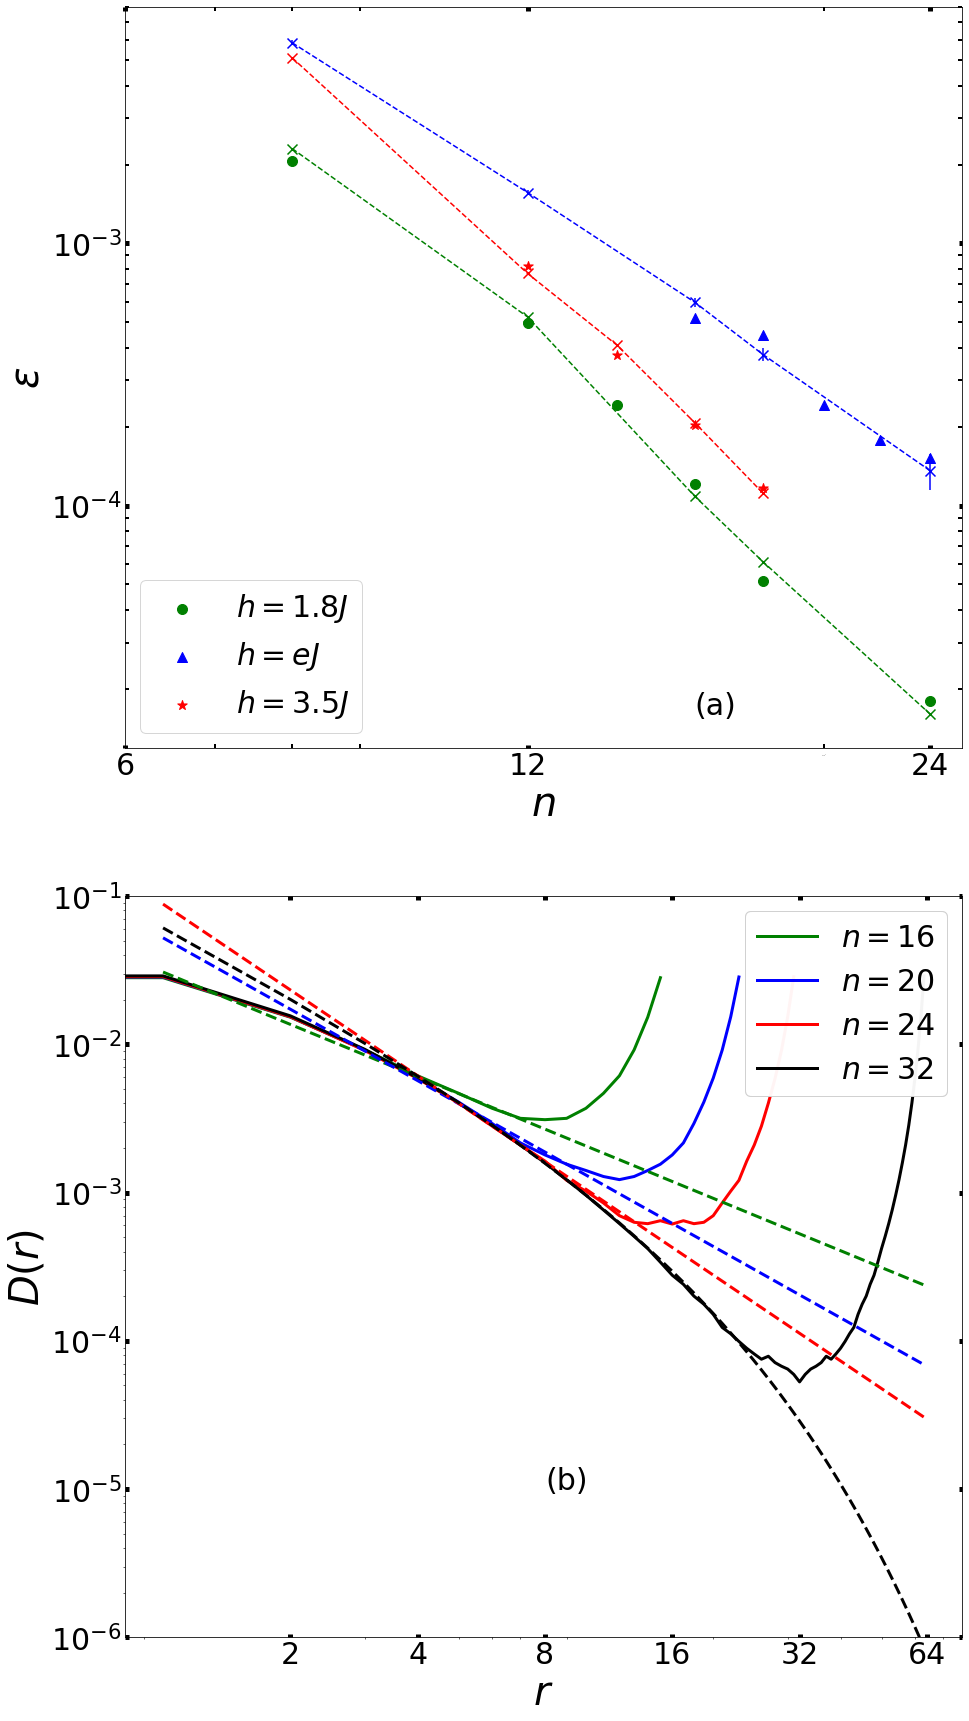

In [177]:
fig,ax=plt.subplots(2,1,figsize=(15,30))



# ax[-1].set_xlabel(r'$n$',fontsize=40)
# ax[-1].set_ylabel(r'$\overline{|\Delta_r u|}$',fontsize=40)
# #plt.axvline(x=48,color='black')

# ax[-1].tick_params(
#         top=True,
#         right=True,
#         labeltop=False,
#         labelright=False,
#         direction="in",
#         labelsize=30,
#         width=5,
#     )
# #plt.xlim(9,32)


# ####################################


# line1,=ax[-1].plot(x,np.exp(2.88)*x**(-1*5.),color='green',linestyle='--',label=r'$\beta=5.0(2)$')
# line2,=ax[-1].plot(x,np.exp(1.)*x**(-3.3),color='blue',linestyle='--',label=r'$\beta=3.3(2)$')
# line3,=ax[-1].plot(x,np.exp(-0.9)*x**(-1*4.7),color='red',linestyle='--',label=r'$\beta=4.7(2)$')
# legend1=ax[-1].legend(fontsize=30,loc='lower left',handles=[a,b,c],fancybox=True,framealpha=0.3)
# ax[-1].add_artist(legend1)
# legend2=ax[-1].legend(fontsize=30,handles=[line1,line2,line3],loc='upper right',fancybox=True,framealpha=0.3)
# ax[-1].set_xlim([4,64])
# ax[-1].set_ylim([10**-8,10**-3])
# ax[-1].loglog()
# ax[-1].set_xlabel(r'$n$',fontsize=40)
# ax[-1].set_ylabel(r'$\epsilon$',fontsize=40)
# ax[-1].tick_params(
#         top=True,
#         right=True,
#         labeltop=False,
#         labelright=False,
#         direction="in",
#         labelsize=30,
#         width=5,
#     )
# ax[-1].set_xticks([9,18,36],[9,18,36])

# ax[-1].text(x=13,y=10**-7.,s='(c)',fontsize=30)
# plt.minorticks_off()

################################


ns=[8,12,14,16,18,24]
x=np.arange(4,64)
data=np.load('estimation_error_h_18.npz')
values_18=data['df']
err_values_18=data['err_df']
ns_18=data['ns']

data=np.load('estimation_error_h_27.npz')
values_27=data['df']
err_values_27=data['err_df']
ns_27=data['ns']

data=np.load('estimation_error_h_35.npz')
values_35=data['df']
err_values_35=data['err_df']
ns_35=data['ns']


#ax[0].errorbar(ns_18,values_18,color='green')
a1=ax[0].scatter(ns_18,1.1*values_18,marker='o',s=100,color='green',label=r'$h=1.8J$')
#ax[0].errorbar(ns_27,values_27,color='blue')
b1=ax[0].scatter(ns_27,0.9*values_27,marker='^',s=100,color='blue',label=r'$h=eJ$')
#ax[0].errorbar(ns_35,values_35,color='red')
c1=ax[0].scatter(ns_35,1.9*values_35,marker='*',s=100,color='red',label=r'$h=3.5J$')


data=np.load('de_35.npz')
blocks=data['blocks']
devde_35=data['devde_35']
de_35=data['de_35']

ax[0].plot(blocks,de_35,color='red',linestyle='--')
a=ax[0].scatter(blocks,de_35,color='red',marker='x',s=100,label=r'$h=3.5 J $')
x=np.asarray(blocks)
#line2,=ax[0].plot(x,np.exp(4.5)*x**(-4.7),linestyle='--',color='red',label=r'$\beta= 4.7(2)$')
data=np.load('de_27.npz')
blocks=data['blocks']
devde_27=data['devde_27']
de_27=data['de_27']
ax[0].errorbar(blocks,de_27,yerr=devde_27/np.sqrt(200),color='blue',linestyle='--')
b=ax[0].scatter(blocks,de_27,color='blue',marker='x',s=100,label=r'$h=e J $')

x=np.asarray(blocks)
data=np.load('de_18.npz')
blocks=data['blocks']
devde_18=data['devde_18']
de_18=data['de_18']
ax[0].plot(blocks,de_18,color='green',linestyle='--')
c=ax[0].scatter(blocks,de_18,color='green',marker='x',s=100,label=r'$h=1.8 J$')


data=np.load('de_56.npz')
l_train=data['blocks']
devde_56=data['devde_56']
de_56=data['de_56']
#ax[0].plot(l_train,de_56,color='c')
#d=ax[0].scatter(l_train,de_56,color='c',marker='<',s=100,label=r'$h=5.6J \; (2nn)$')
#plt.errorbar(blocks,final_de_25,yerr=de_err,color='green',marker='o',label=r'$h=2.5 J (\sim 0.92 h_c)$')
#plt.plot(x,2.5*x**(-3.),linestyle='--',color='red')
#plt.text(x=13,y=0.0015,s=r'$\beta \simeq 3$',fontsize=30,color='blue',rotation = -35,
#         rotation_mode = 'anchor')


#line3,=ax[0].plot(x,np.exp(4.88)*x**(-5.03),linestyle='--',color='green',label=r'$\beta= 5.0(2)$')
#plt.text(x=13,y=0.00075,s=r'$D(n,h=3.5J)$',fontsize=30,color='red',rotation = -40,
#         rotation_mode = 'anchor')
#plt.errorbar(blocks,final_de_25,yerr=de_err,color='green',marker='o',label=r'$h=2.5 J (\sim 0.92 h_c)$')
#line1,=ax[0].plot(x,np.exp(1.67)*x**(-3.3),linestyle='--',color='blue',label=r'$\beta=3.3(2)$')
x=np.asarray(l_train)
#line4,=ax[0].plot(x,np.exp(1.67)*x**(-2.93),linewidth=3,linestyle='--',color='c',label=r'$\beta=2.9(2)$')
#legend1=ax[0].legend(fontsize=30,handles=[a,b,c],loc='upper right',framealpha=0.5,fancybox=True)
ax[0].text(x=16,y=1.6*10**-5,s='(a)',fontsize=30)
#plt.text(x=13,y=0.00036,s=r'$D(n,h=1.8J)$',fontsize=30,color='green',rotation = -42,
#        rotation_mode = 'anchor')
#plt.plot(x,0.02*np.exp(-0.16*x),linestyle=':',color='green',label=r'$\propto exp(-l/\xi) (h_c)$',linewidth=3)
ax[0].tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
#plt.semilogy()


ax[0].set_xlabel(r'$n$',fontsize=40)
ax[0].set_ylabel(r'$\epsilon $',fontsize=40)


ax[0].set_yticks([0.01,0.001,0.0001,0.00001],[r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$",r"$10^{-5}$"])

ax[0].legend(fontsize=30,handles=[a1,b1,c1],loc='lower left')
#ax[0].add_artist(legend1)
#ax[0].minorticks_off()
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=None,numticks=0)

ax[0].loglog()
ax[0].tick_params(
            which='minor',
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=0,
            width=2,
            length=4
            
        )
ax[0].set_xticks([6,12,24],[6,12,24])
#plt.xticks([10,14,18,22,26,30],[10,14,18,22,26,30])
plt.savefig('plot_for_the_paper/scalability_error/scaling_law_two_plots_b.pdf',format='pdf',bbox_inches = "tight")
#plt.savefig('plot_for_the_paper/scalability_error/pearson_different_disorder',format='pdf')

plt.show()

#### Find the behaviour

power law LinregressResult(slope=-2.870202137548721, intercept=2.3820119659961323, rvalue=-0.9994657017925728, pvalue=3.3632798114028376e-28, stderr=0.02212367009542068, intercept_stderr=0.06731582428758386)


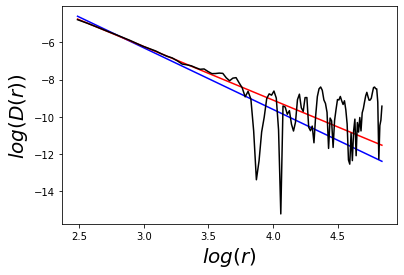

In [269]:
from scipy.optimize import curve_fit

def f(x,a):
    return a*x**(-4.87)



r_pl=linregress(np.log(np.arange(12,32)),np.log(g[2.7][12:32]))
#r_exp=linregress(np.log(np.arange(9,32)),np.log(g[1.8][9:32]))
print('power law',r_pl)

x=np.log(np.arange(12,128))

plt.plot(x,-3.3*x+3.6,color='blue')
plt.plot(x,-2.87*x+2.38,color='red')
plt.plot(x,np.log(g[2.7][12:128]),color='black')
plt.xlabel(r'$log(r)$',fontsize=20)
plt.ylabel(r'$log(D(r))$',fontsize=20)
plt.show()

#### Error of the pearson coefficient

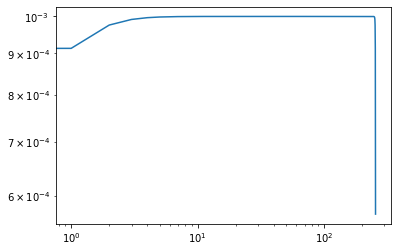

In [82]:
h=3.5
sigma_g=np.sqrt((1-g[h]**2)/10**6)

plt.plot(sigma_g)
plt.loglog()
plt.show()

## 2nn Ising Case

#### Imports

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

#### Data

In [46]:
ls=[256]
zs={}
fs={}
cov={}
g={}


for l in ls:
    data=np.load(f'data/dataset_2nn/final_test/test_pbc_{l}_l_5.6_h_15000_n.npz')

    z=data['density'][:3000]
    f=data['density_F'][:3000]
    
    print(z[-1])


            
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    print('done df')
    av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
    print('done av_zf')
    std_av=(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    print('done std_av')
    av_z_av_f=(np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:])
    av_zf=av_zf-av_z_av_f
    cov=av_zf/std_av
    
    c=np.zeros((l,l))

    
    for s in range(l):
        for j in range(l):
            c[s,j]=cov[s,(s+j) %l]
            
    g[l]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

[-0.56421626 -0.30631367 -0.89060032 -0.8505057  -0.93430956 -0.94071882
 -0.94467545 -0.90474038 -0.83334471 -0.76553802 -0.62127769 -0.79213439
 -0.56668816 -0.87122997 -0.23418496 -0.64467228 -0.38626241 -0.83974758
 -0.86746781 -0.59725457 -0.41840367 -0.56423988 -0.41382893 -0.45160493
 -0.75879447 -0.67599168 -0.73852553 -0.88737383 -0.85337454 -0.16516188
 -0.69345875 -0.68065316 -0.63128667 -0.29453539 -0.81462619 -0.60830505
 -0.45581078 -0.23158565 -0.84447532 -0.68572761 -0.81190206 -0.93115389
 -0.93003148 -0.95631282 -0.94868134 -0.95896724 -0.94819824 -0.96050211
 -0.94660936 -0.95772274 -0.9098063  -0.93949472 -0.90831741 -0.76816244
 -0.80803575 -0.70972786 -0.88239096 -0.87173955 -0.87206793 -0.76596208
 -0.60120075 -0.22627456 -0.46403578 -0.05555403 -0.42718268 -0.24019299
 -0.81280751 -0.67003642 -0.75210277 -0.06404824 -0.77336945 -0.78441562
 -0.41653849 -0.37983384 -0.65078    -0.79363905 -0.84650553 -0.86623731
 -0.65837648 -0.68327765 -0.66608801 -0.43693315 -0

#### Plots

In [ ]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(g[l],shift=1),label=r'$h=5.6J$',linewidth=3,)

plt.plot(np.exp(2.83)*(np.arange(128))**(-3.),label=r'$\beta=3.0(2)$',linestyle='--',color='blue',linewidth=3)

plt.loglog()
#plt.semilogy()
plt.legend(fontsize=30)
plt.xlabel(r'$r$',fontsize=40)
plt.ylabel(r'$D(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64,128,256],[2,4,8,16,32,64,128,256])
plt.tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
plt.text(1,10**-6,s='(c)',fontsize=30)
plt.savefig('plot_for_the_paper/scalability_error/pearson_different_disorder_2nn.eps',format='eps',bbox_inches = "tight")
plt.show()

In [167]:
from scipy.stats import linregress

linregress(np.log(np.arange(12,18)),np.log(g[256][12:18]))

KeyError: 256

## Long range

#### Imports

In [113]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [44]:
ls=[16,17,18,19,20]
zs={}
fs={}
cov={}
g={}
for l in ls:
    data=np.load(f'data/dataset_long_range/unet_long_range_pbc_4.0_alpha_3_h_1.0_j_{l}_l_301_n.npz')
    z=data['density']
    f=data['density_F']
    zs[l]=z
    fs[l]=f
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    cov[l]=np.average(dz[:,:,None]*df[:,None,:],axis=0)-np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:]
    cov[l]=cov[l]/(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    
    idx=np.arange(l)
    c=np.zeros((l,l))
    print(c.shape)
    print(cov[l].shape)
    # for i in range(l):
    #     c[i%l,:]=cov[l][idx,(idx+i)%l]
        
    for i in range(l):
        for j in range(l):
            c[i,j]=cov[l][i,(i+j) %l]

    g[l]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

(16, 16)
(16, 16)
(17, 17)
(17, 17)
(18, 18)
(18, 18)
(19, 19)
(19, 19)
(20, 20)
(20, 20)


#### Plots

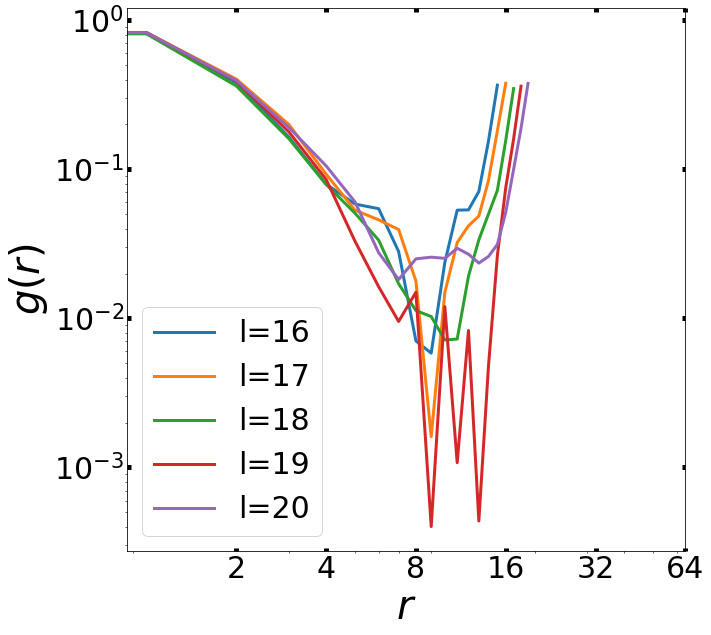

In [45]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(g[l],shift=1),label=f'l={l}',linewidth=3,)
plt.loglog()
plt.legend(fontsize=30)
plt.xlabel(r'$r$',fontsize=40)
plt.ylabel(r'$g(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
plt.tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
plt.show()

## Simple estimation of the prediction error from the covariance

In [150]:
import numpy as np

[ 1.84453785 21.80982039  1.95492603]


/tmp/ipykernel_1575772/1262846162.py:4: RuntimeWarning: divide by zero encountered in power
  return a*(x**(-1*c))*np.exp(-(x/b))


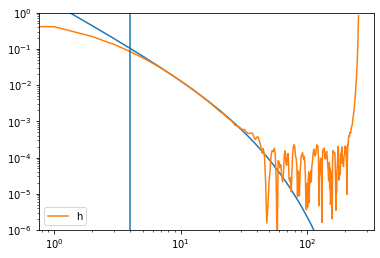

In [290]:
from scipy.optimize import curve_fit

def d1(x,a,b,c):
    return a*(x**(-1*c))*np.exp(-(x/b))

def d2(x,a,b,c,d,e):
    return a*(x**(-b))+c*(np.exp(-(x/d)**e))

for h in [2.7]:
    x=np.arange(8,64)
    y=np.arange(256)
    param,boh=curve_fit(d1,x,g[h][8:64],maxfev=10000)

    print(param)

    g_ml=d1(y,param[0],param[1],param[2])
    plt.plot(y,g_ml)
    plt.plot(y,g[h],label='h')
    plt.ylim([10**-6,1])
    plt.axvline(x=4)
#np.save('str_exp_2.7',g_ml)

#plt.plot(y[65],g_fz[64])
plt.loglog()
plt.legend()
plt.show()


In [135]:
h=1.8
l=64
ns=[8,12,14,16,18,24]


scale={}
for n in ns:
    scale[n]=np.load(f'h_{h}_diff_correlation_{n}.npy')
    #print(scale[n])
ndata=1000
hist=np.zeros((len(ns),ndata))
for a in trange(ndata):
    for i in range(l):
        values=[]
        for n in ns:
            r=np.arange(n//2,l//2)
            ratio=2/r
            x1=np.random.normal(loc=0.,scale=scale[n][r])
            x2=np.random.normal(loc=0.,scale=scale[n][r])
            
            #x=ratio**beta
            #x=np.random.poisson(lam=ratio**beta)
            #r=np.random.uniform(0,1,size=x.shape[0])
            #x[r>0.5]=-1*x[r>0.5]
            values.append((np.sum(x1))+np.sum(x2))
        values=np.asarray(values)
        if i==0:
            values_l=values
        else:
            values_l=values_l+values
    values_l=(values_l/l)
    hist[:,a]=values_l
    values_l=np.abs(values_l)
    if a==0:
        values_tot=values_l
        values_sq=values_l**2
    else:
        values_tot=values_tot+values_l
        values_sq=values_sq+values_l**2
values_tot=values_tot/ndata
values_sq=(values_sq/ndata-values_tot**2)


  0%|          | 0/1000 [00:00<?, ?it/s]

#### Comparison with the errors

[2.02262606e-06 1.15040697e-07 2.84065449e-08 6.54501915e-09
 1.29056111e-09 1.60778166e-10]


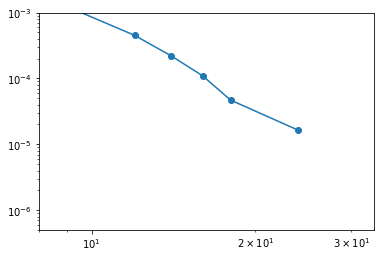

LinregressResult(slope=-4.908845444467875, intercept=4.463137271756818, rvalue=-0.9942701525141175, pvalue=0.0005202053721635016, stderr=0.3047037889679743, intercept_stderr=0.8540506177275033)


In [136]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
print(values_sq)
x=np.arange(1,64)
err_values=np.sqrt(values_sq)
new_values_tot=values_tot
np.savez('estimation_error_h_18',df=new_values_tot,err_df=err_values,ns=np.asarray(ns))

new_values_tot=values_tot
plt.errorbar(np.asarray(ns),new_values_tot,marker='o')
#plt.plot(x,np.exp(4.59)*x**(-1*5.01),)

plt.xlim([8,33])
plt.ylim([5*10**-7,10**-3])
plt.loglog()
plt.show()

print(linregress(np.log(np.asarray(ns[1:])),np.log(values_tot[1:])))


### Final plot with values_xx

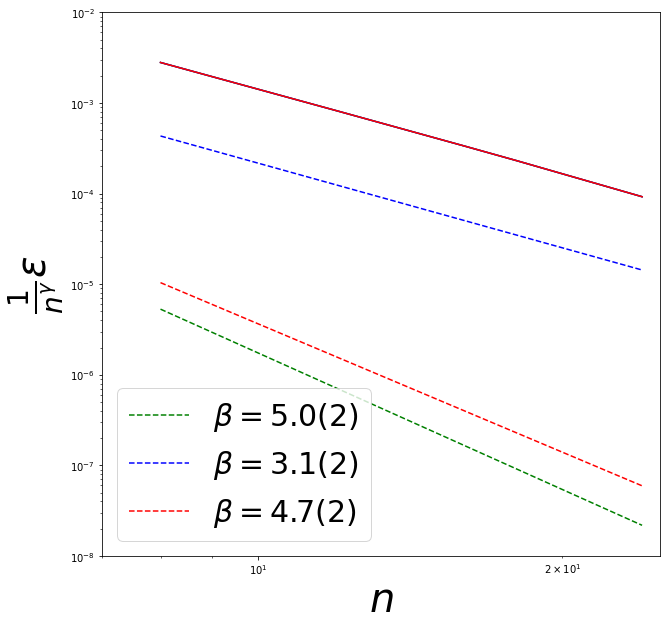

In [14]:

x=np.asarray(ns)
data=np.load('estimation_error_h_27.npz')
values_18=data['df']
err_values_18=data['err_df']
plt.figure(figsize=(10,10))
plt.errorbar(ns,values_18,yerr=err_values_18/np.sqrt(200),color='green')
plt.plot(x,np.exp(-1.75)*x**(-1*5.),color='green',linestyle='--',label=r'$\beta=5.0(2)$')
data=np.load('estimation_error_h_27.npz')
values_27=data['df']
err_values_27=data['err_df']
plt.errorbar(ns,values_27,yerr=err_values_27/np.sqrt(200),color='blue')
plt.plot(x,np.exp(-1.3)*x**(-3.1),color='blue',linestyle='--',label=r'$\beta=3.1(2)$')
data=np.load('estimation_error_h_35.npz')
values_35=data['df']
err_values_35=data['err_df']
plt.errorbar(ns,values_35,yerr=err_values_35/np.sqrt(200),color='red')
plt.plot(x,np.exp(-1.7)*x**(-1*4.7),color='red',linestyle='--',label=r'$\beta=4.7(2)$')
plt.xlim([7,25])
plt.ylim([10**-8,10**-2])
plt.loglog()
plt.xlabel(r'$n$',fontsize=40)
plt.ylabel(r'$\frac{1}{n^{\gamma}}\epsilon$',fontsize=40)
plt.legend(fontsize=30)
plt.show()

#### u_0 scaling

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

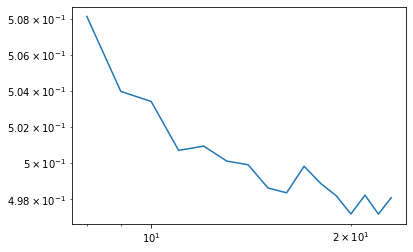

In [96]:
def mario(x,a,b,c):
    return a*x**b +c

fs=[]
ns=np.arange(8,24)
for n in (ns):
    data=np.load(f'data/dataset_1nn/240123/unet_periodic_{n}_l_2.7_h_6000_n.npz')
    f=data['F']
    fs.append(np.abs(np.average(f)))
plt.loglog()
plt.plot(ns,np.asarray(fs))

plt.show()

    